# Prueba con nuevos datasets (propio) .h5

In [1]:
import os
from PIL import Image
import numpy as np


def cargar_imagenes_con_etiquetas(ruta_dataset):
    imagenes = []
    etiquetas = []
    
    for etiqueta in os.listdir(ruta_dataset):
        carpeta = os.path.join(ruta_dataset, etiqueta)
        if os.path.isdir(carpeta):
            for archivo in os.listdir(carpeta):
                if archivo.endswith('.tif') or archivo.endswith('.png') or archivo.endswith('.jpg'):
                    img_path = os.path.join(carpeta, archivo)
                    img = Image.open(img_path)
                    imagenes.append(np.array(img)) 
                    etiquetas.append(etiqueta)
    
    return imagenes, etiquetas

def obtener_tamanios_por_etiqueta(imagenes, etiquetas):
    tamanios_por_etiqueta = {}
    for img, etiqueta in zip(imagenes, etiquetas):
        tamanio = img.shape[:2]
        if etiqueta not in tamanios_por_etiqueta:
            tamanios_por_etiqueta[etiqueta] = set()
        tamanios_por_etiqueta[etiqueta].add(tamanio)
    return tamanios_por_etiqueta

def redimensionar_imagenes(imagenes, nuevo_tamanio):
    imagenes_redimensionadas = []
    for img in imagenes:
        img_pil = Image.fromarray(img)
        img_redimensionada = img_pil.resize(nuevo_tamanio, Image.ANTIALIAS)
        imagenes_redimensionadas.append(np.array(img_redimensionada))
    return imagenes_redimensionadas

def verificar_tamanio(imagenes):
    tamanio_referencia = None
    for img in imagenes:
        if tamanio_referencia is None:
            tamanio_referencia = img.shape[:2]
        else:
            if img.shape[:2] != tamanio_referencia:
                return False
    return True

def normalizar_imagenes(imagenes):
    imagenes_array = np.array(imagenes)
    imagenes_normalizadas = imagenes_array / 255.0
    media = np.mean(imagenes_normalizadas, axis=(0, 1, 2))
    imagenes_normalizadas -= media
    return imagenes_normalizadas

# Cargar y procesar las imágenes
ruta_dataset = 'C:/Users/nicol/Desktop/Propio_2'
imagenes, etiquetas = cargar_imagenes_con_etiquetas(ruta_dataset)

# Obtener tamaños por etiqueta antes de redimensionar
tamanios_por_etiqueta = obtener_tamanios_por_etiqueta(imagenes, etiquetas)

nuevo_tamanio = (256, 256)
imagenes_redimensionadas = redimensionar_imagenes(imagenes, nuevo_tamanio)

if verificar_tamanio(imagenes_redimensionadas):
    print("Todas las imágenes tienen el mismo tamaño.")
else:
    print("Las imágenes tienen diferentes tamaños.")
    
imagenes_normalizadas = normalizar_imagenes(imagenes_redimensionadas)

# Codificar las etiquetas
codificacion = {'Basket': 0, 'Campo_Futbol': 1, 'Cancha_Multiple': 2, 'Parque' : 3, 'Tenis': 4}
etiquetas_codificadas = np.array([codificacion[etiqueta] for etiqueta in etiquetas])

import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Cargar el modelo previamente entrenado
modelo_path = 'C:/Users/nicol/Desktop/Modelos/Propio/Propio_VGG16.h5'
model = tf.keras.models.load_model(modelo_path)

# Realizar predicciones
predicciones = model.predict(imagenes_normalizadas)
predicciones_clase = np.argmax(predicciones, axis=1)  # Convertir probabilidades a clases predichas

# Comparar predicciones con etiquetas originales
accuracy = accuracy_score(etiquetas_codificadas, predicciones_clase)
precision = precision_score(etiquetas_codificadas, predicciones_clase, average=None)  
recall = recall_score(etiquetas_codificadas, predicciones_clase, average=None)        
f1 = f1_score(etiquetas_codificadas, predicciones_clase, average=None)                

# Reporte por clase
reporte_clases = classification_report(etiquetas_codificadas, predicciones_clase)

# Mostrar resultados
print("Accuracy:", accuracy)
print("\nPrecision por clase:", precision)
print("\nRecall por clase:", recall)
print("\nF1-Score por clase:", f1)
print("\nReporte completo:\n", reporte_clases)


C:\Users\nicol\AppData\Local\Temp\ipykernel_7272\1816295156.py:35: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img_redimensionada = img_pil.resize(nuevo_tamanio, Image.ANTIALIAS)


Todas las imágenes tienen el mismo tamaño.


54/54 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step
Accuracy: 0.9190615835777126

Precision por clase: [0.92459016 0.99706745 0.78920308 0.97032641 0.93393393]

Recall por clase: [0.7877095  0.92140921 0.93597561 0.99695122 0.96583851]

F1-Score por clase: [0.85067873 0.95774648 0.85634589 0.98345865 0.94961832]

Reporte completo:
               precision    recall  f1-score   support

           0       0.92      0.79      0.85       358
           1       1.00      0.92      0.96       369
           2       0.79      0.94      0.86       328
           3       0.97      1.00      0.98       328
           4       0.93      0.97      0.95       322

    accuracy                           0.92      1705
   macro avg       0.92      0.92      0.92      1705
weighted avg       0.92      0.92      0.92      1705



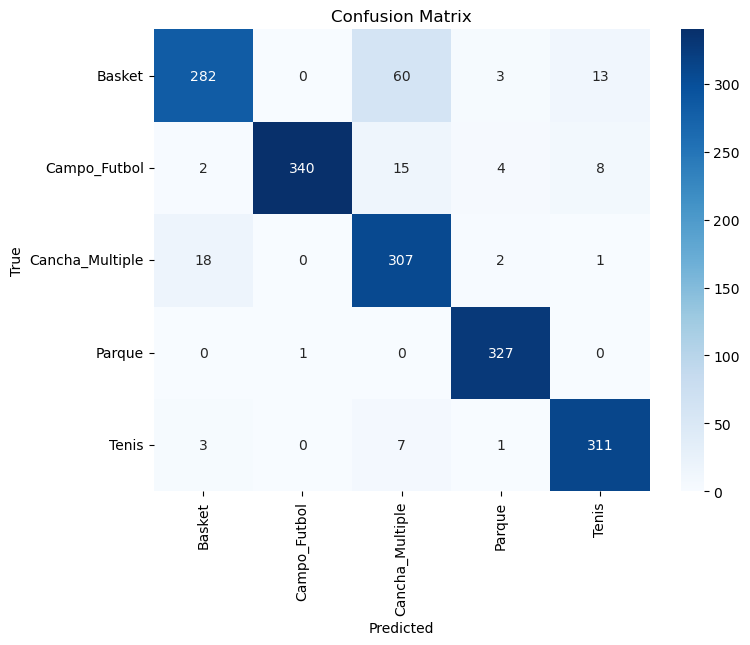

In [2]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generar la matriz de confusión
matriz_confusion = confusion_matrix(etiquetas_codificadas, predicciones_clase)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', xticklabels=codificacion.keys(), yticklabels=codificacion.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()